In [1]:
import os
import torch
import copy
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from pathlib import Path
from matplotlib import cm

DATE = '2020-09-15_EnvAlt_val'
suffix = 'fsc_V2.3_eps0.15_0.17_shell_V2.2_eps0.000025'
EXP = 'evaluation_run2_' + suffix 
LOAD_DIR = Path('../saved_data') / DATE / EXP

plots = []
fig_count = 0
figsize = (15, 5)
figsize_single = (10, 4)
labelpad = 15

# load data of all samples
states, support_calc, configs, actions, rewards = dict(), dict(), dict(), dict(), dict()
r_shell = dict()
for sample in next(os.walk(LOAD_DIR))[1]:
    states.update({sample: torch.load(LOAD_DIR / sample / 'batch_states')})
    support_calc.update({sample: torch.load(LOAD_DIR / sample / 'support_calc')})
    configs.update({sample: torch.load(LOAD_DIR / sample / 'config')})
    actions.update({sample: torch.load(LOAD_DIR / sample / 'batch_actions')})
    rewards.update({sample: torch.load(LOAD_DIR / sample / 'rewards')})
    r_shell.update({sample: torch.load(LOAD_DIR / sample / 'r_shell')})
title_suffix = ' - (' + suffix + ')'
# ax[0].elev --> 30 default, azim = -60 

In [ ]:
a = []
b = []
for key in ['FSC', 'Shell']:
    for sample in next(os.walk(LOAD_DIR))[1]:
        b.append(rewards[sample][key][0, :, 0])
        a.append(sum(i > 10**-5 for i in rewards[sample][key][0, :, 0])) 
    print(key + ': {}'.format(np.array(a).mean()))
    print(key + ': {}'.format(np.array(b).mean()))

In [ ]:
78/2 FSC:2.2 Shell: 1.3

In [ ]:
configs[sample]
len(np.arange(0.01, 0.2, 0.02))

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
for i in range(10):
    x = range(0, states[sample]['Shell'].shape[1])
    y = states[sample]['Shell'][i, :, 0]
    ax.plot(x,y)

<h2><center>plots for support of Gov and Shell - research</center></h2>


In [ ]:
# %matplotlib inline
%matplotlib notebook
%matplotlib notebook

fig = plt.figure(fig_count, figsize=figsize)
plt.rcParams.update({'font.size': 12})
plt.tight_layout()

plots.append(fig)
fig_count += 1

# create and set fig properties
c = ['b', 'g']
ax = [fig.add_subplot(121, projection='3d'), fig.add_subplot(122, projection='3d')]
fig.suptitle('support - action: all random'  + title_suffix)
# fig.tight_layout()

for i, key in enumerate(['Shell', 'Gov']):
    flag = True
    for sample in next(os.walk(LOAD_DIR))[1]:
        x = range(0, states[sample][key].shape[1])
        mean = states[sample][key][0, :, 0]#.mean(axis=0)[:, 0]#  [0, :, 0]#+ states[sample]['Gov'].mean(axis=0)[:, 0]
        if configs[sample]['delta_research'] <= 1:
            if flag:
                ax[0].plot(x, mean, configs[sample]['delta_research'], zdir='y', c=c[i], label=key, alpha=0.7)
                ax[1].plot(x, mean, configs[sample]['beta'], zdir='y', c=c[i], label=key, alpha=0.7)
                flag = False
            ax[0].plot(x, mean, configs[sample]['delta_research'], zdir='y', c=c[i], alpha=0.7)
            ax[1].plot(x, mean, configs[sample]['beta'], zdir='y', c=c[i], alpha=0.7)
for axis in ax:    
    axis.set_xlabel('step', labelpad=labelpad)
    axis.set_zlabel(r'$\sigma_i$' + ' - level of support', labelpad=labelpad)
    axis.view_init(elev=20,azim=-25)
ax[0].set_ylabel(r'$\Delta_{research}$', labelpad=labelpad)
ax[1].set_ylabel(r'$\beta$', labelpad=labelpad)

fig.legend()
# fig.tight_layout()
fig.show()

In [ ]:
a = []
for sample in next(os.walk(LOAD_DIR))[1]:
    a.append(states[sample]['FSC'].mean())
np.array(a).mean()

<h2><center>plots for support  with vars</center></h2>


In [ ]:
for key in ['Shell','Gov','FSC']:
    a = []
    for sample in next(os.walk(LOAD_DIR))[1]:
        a.append(states[sample][key][:, :, 0])
    print(key + ': ' + str(np.array(a).max()))    

In [ ]:
# %matplotlib inline
%matplotlib notebook
%matplotlib notebook

fig = plt.figure(fig_count, figsize= (15, 10))
plt.rcParams.update({'font.size': 10})
plots.append(fig)
fig_count += 1

colorbar = 'beta'
cmap = cm.get_cmap('winter')
vmin = np.array([configs[sample][colorbar] for sample in next(os.walk(LOAD_DIR))[1]]).min()
vmax = np.array([configs[sample][colorbar] for sample in next(os.walk(LOAD_DIR))[1]]).max()
mappable = cm.ScalarMappable(cmap=cmap, norm=mpl.colors.Normalize(vmin=vmin, vmax=vmax))
ax = [fig.add_subplot(221, projection='3d'), fig.add_subplot(222, projection='3d'),
      fig.add_subplot(223, projection='3d'), fig.add_subplot(224, projection='3d')]
fig.colorbar(mappable, label=r'$\beta$')

fig.suptitle('batch mean' + title_suffix)
# fig.suptitle('single episode' + title_suffix)

for i, key in enumerate(['Shell','Gov','FSC', 'FSC']): # FSC is the combined support
    for s, sample in enumerate(next(os.walk(LOAD_DIR))[1]):
        x = range(0, states[sample][key].shape[1])
        mean = states[sample][key].mean(axis=0)[:, 0]#[0, :, 0]#
        val = (configs[sample][colorbar]-vmin)/(vmax-vmin)
        if states[sample][key][:, :, 0].max() <= 1 and states[sample][key].mean(axis=0)[77, 0] <= 1:
            if i == 3:
                ax[i].plot(x, mean, configs[sample]['delta_resource'], zdir='y', c=(cmap(val)[0], cmap(val)[1], cmap(val)[2]))
            else:
                ax[i].plot(x, mean, configs[sample]['delta_research'], zdir='y', c=(cmap(val)[0], cmap(val)[1], cmap(val)[2]))#,\
#                      linestyle='', marker='o')
            
    ax[i].set_title('support ' + key + ' - action: all random')
    if key == 'FSC':
        ax[i].set_title('total support - action: all random')
    ax[i].set_xlabel('step', labelpad=labelpad)
    ax[i].set_ylabel(r'$\Delta_{\eta}$', labelpad=labelpad)
    if i==3:
        ax[i].set_ylabel(r'$\Delta_{\rho}$', labelpad=labelpad)
    ax[i].set_zlabel('support', labelpad=labelpad)
fig.tight_layout()

<h3>$\beta$, $\Delta_{research}$ - final support</h3>

In [ ]:
%matplotlib inline
# %matplotlib notebook
# %matplotlib notebook

fig = plt.figure(fig_count, figsize= (15,5))
plt.rcParams.update({'font.size': 10})
plots.append(fig)
fig_count += 1

colorbar = 'beta'
cmap = cm.get_cmap('winter')
cmap_ = cm.get_cmap('copper')
vmin = np.array([configs[sample][colorbar] for sample in next(os.walk(LOAD_DIR))[1]]).min()
vmax = np.array([configs[sample][colorbar] for sample in next(os.walk(LOAD_DIR))[1]]).max()
mappable = cm.ScalarMappable(cmap=cmap, norm=mpl.colors.Normalize(vmin=vmin, vmax=vmax))
mappable_ = cm.ScalarMappable(cmap=cmap_, norm=mpl.colors.Normalize(vmin=vmin, vmax=vmax))
ax = [fig.add_subplot(111)]
fig.colorbar(mappable_, label='max support over 0.2')
fig.colorbar(mappable, label=r'$\beta$')

key ='FSC'
a = []
for s, sample in enumerate(next(os.walk(LOAD_DIR))[1]):
    y = states[sample][key].mean(axis=0)[77, 0]
    x = configs[sample]['delta_research']
    sup = states[sample][key].mean(axis=0)[77, 0]#[0, :, 0]#
    val = (configs[sample][colorbar]-vmin)/(vmax-vmin)
    if  sup <=0.3: #0.14 <= sup and sup <= 0.2: #and 
        if states[sample][key][:, :, 0].max() > 0.2:
            ax[0].scatter(x, y, marker='o', color=(cmap_(val)[0], cmap_(val)[1], cmap_(val)[2]))
        else:
            a.append(states[sample][key][:, :, 0])
            ax[0].scatter(x, y, marker='o', color=(cmap(val)[0], cmap(val)[1], cmap(val)[2]))

ax[0].set_title('total final support of batch mean' + title_suffix +  ' - action: all random' )
ax[0].set_xlabel(r'$\Delta_{\eta}$', labelpad=labelpad)
ax[0].set_ylabel(r'$\sigma^{78}$', labelpad=labelpad)
fig.tight_layout()
print(key + ': ' + str(np.array(a).max())) 

<h2><center>plots for reward</center></h2>

<h3>y: $\Delta_{\rho}$, colorbar: $\Delta_{\eta}$</h3>

<IPython.core.display.Javascript object>


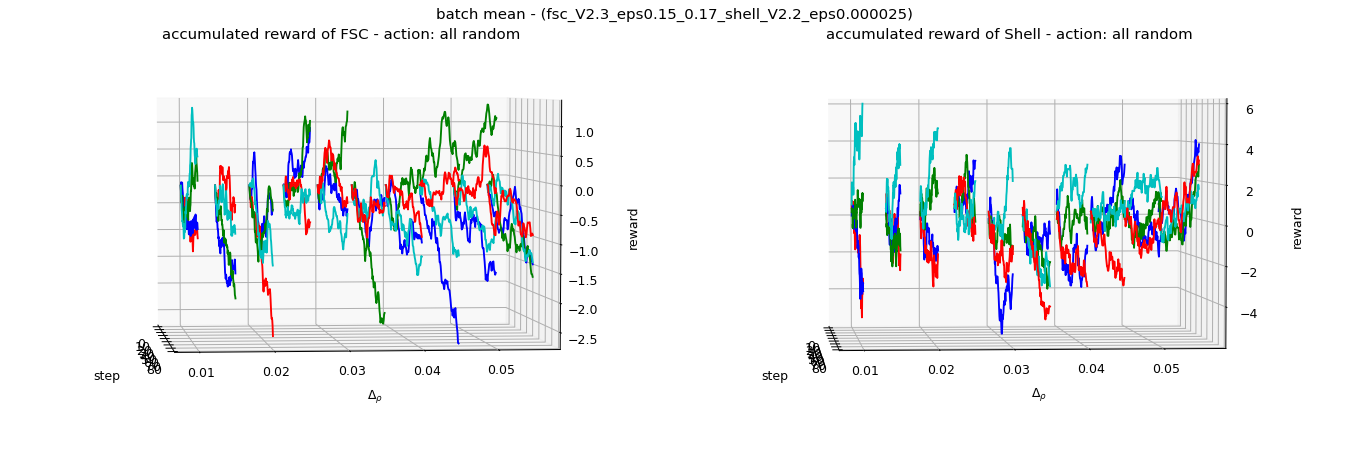

In [2]:
# %matplotlib inline
%matplotlib notebook
%matplotlib notebook

fig = plt.figure(fig_count, figsize=figsize)
plt.rcParams.update({'font.size': 10})
plots.append(fig)
fig_count += 1

colorbar = 'delta_research'
cmap = cm.get_cmap('winter')
vmin = np.array([configs[sample][colorbar] for sample in next(os.walk(LOAD_DIR))[1]]).min()
vmax = np.array([configs[sample][colorbar] for sample in next(os.walk(LOAD_DIR))[1]]).max()
mappable = cm.ScalarMappable(cmap=cmap, norm=mpl.colors.Normalize(vmin=vmin, vmax=vmax))
ax = [fig.add_subplot(121, projection='3d'), fig.add_subplot(122, projection='3d')]
# fig.colorbar(mappable, label=r'$\Delta_{\eta}$')
c = {'0.17': 'r',
     '0.08': 'b',
     '0.05': 'g',
     '0.03': 'c'}

fig.suptitle('batch mean' + title_suffix)
# fig.suptitle('single episode' + title_suffix)

for i, key in enumerate(['FSC', 'Shell']):
    for s, sample in enumerate(next(os.walk(LOAD_DIR))[1]):
        x = range(0, rewards[sample][key].shape[1])
        mean = rewards[sample][key].mean(axis=0)[:, 0].cumsum()#[0, :, 0]#.cumsum()#
        val = (configs[sample][colorbar]-vmin)/(vmax-vmin)
        if configs[sample]['delta_research'] >= 0.00:# and configs[sample]['delta_resource'] < 0.005:
#             ax[i].plot(x, mean, configs[sample]['delta_resource'], zdir='y', c=(cmap(val)[0], cmap(val)[1], cmap(val)[2]))#,\
#                      linestyle='', marker='o')
            ax[i].plot(x, mean, configs[sample]['delta_resource'], zdir='y', color=c[str(configs[sample]['delta_research'])])#,
#                        linestyle='', marker='o', alpha=0.5)

#     ax[i].set_title('reward of ' + key + ' - action: all random')
    ax[i].set_title('accumulated reward of ' + key + ' - action: all random')
    ax[i].set_xlabel('step', labelpad=labelpad)
    ax[i].set_ylabel(r'$\Delta_{\rho}$', labelpad=labelpad)
    ax[i].set_zlabel('reward', labelpad=labelpad)
#     ax[i].view_init(elev=0,azim=-10)#(elev=20,azim=-15)
fig.tight_layout()
# fig.legend()
# fig.show()

In [ ]:
%matplotlib inline

fig = plt.figure(fig_count, figsize=figsize_single)
plt.rcParams.update({'font.size': 10})
plots.append(fig)
fig_count += 1

ax = [fig.add_subplot(111)]
c = {'0.17': ['r', '0.05'],
     '0.08': ['b', '0.10'],
     '0.05': ['g', '0.15'],
     '0.03': ['c', '0.20']}

key = 'Shell'
for s, sample in enumerate(next(os.walk(LOAD_DIR))[1]):
    x = range(0, rewards[sample][key].shape[1])
    mean = rewards[sample][key].mean(axis=0)[:, 0].cumsum()#[0, :, 0]#.cumsum()#
    if 0.024 <= configs[sample]['delta_resource'] and configs[sample]['delta_resource'] <= 0.025:
        print(sample)
        ax[0].plot(x, mean, color=c[str(configs[sample]['delta_research'])][0],\
                   label=('Delta_eta: ' + str(configs[sample]['delta_research']),
                          'beta: ' + c[str(configs[sample]['delta_research'])][1]))#,
ax[0].set_title('accumulated reward of ' + key + ' - action: all random' + title_suffix)
ax[0].set_xlabel('step', labelpad=labelpad)
ax[0].set_ylabel('reward', labelpad=labelpad)
chartBox = ax[0].get_position()
ax[0].set_position([chartBox.x0, chartBox.y0, chartBox.width*0.7, chartBox.height])
ax[0].legend(loc='upper center', bbox_to_anchor = (1.3, 0.6), ncol=1);

<h3>y: $\Delta_{research}$, colorbar: $\beta$</h3>

In [ ]:
# %matplotlib inline
%matplotlib notebook
%matplotlib notebook

fig = plt.figure(fig_count, figsize=figsize)
plt.rcParams.update({'font.size': 10})
plots.append(fig)
fig_count += 1

colorbar = 'beta'
cmap = cm.get_cmap('winter')
vmin = np.array([configs[sample][colorbar] for sample in next(os.walk(LOAD_DIR))[1]]).min()
vmax = np.array([configs[sample][colorbar] for sample in next(os.walk(LOAD_DIR))[1]]).max()
mappable = cm.ScalarMappable(cmap=cmap, norm=mpl.colors.Normalize(vmin=vmin, vmax=vmax))
ax = [fig.add_subplot(121, projection='3d'), fig.add_subplot(122, projection='3d')]
fig.colorbar(mappable, label=r'$\beta$')

fig.suptitle('batch mean' + title_suffix)
# fig.suptitle('single episode' + title_suffix)

for i, key in enumerate(['FSC', 'Shell']):
    for s, sample in enumerate(next(os.walk(LOAD_DIR))[1]):
        x = range(0, rewards[sample][key].shape[1])
        mean = rewards[sample][key].mean(axis=0)[:, 0].cumsum()#[0, :, 0].cumsum()# 
        val = (configs[sample][colorbar]-vmin)/(vmax-vmin)
        if configs[sample]['delta_research'] >= 0.0:
            ax[i].plot(x, mean, configs[sample]['delta_research'], zdir='y', c=(cmap(val)[0], cmap(val)[1], cmap(val)[2]))#,\
#                      linestyle='', marker='o')
#     ax[i].set_title('reward of ' + key + ' - action: all random')
    ax[i].set_title('accumulated reward of ' + key + ' - action: all random')
    ax[i].set_xlabel('step', labelpad=labelpad)
    ax[i].set_ylabel(r'$\Delta_{research}$', labelpad=labelpad)
    ax[i].set_zlabel('reward', labelpad=labelpad)
#     ax[i].view_init(elev=0,azim=-10)#(elev=20,azim=-15)
fig.tight_layout()
# fig.show()


<h3>y: $\Delta_{resource}$, colorbar: $\Delta_{research}$</h3>

In [ ]:
# %matplotlib inline
%matplotlib notebook
%matplotlib notebook

fig = plt.figure(fig_count, figsize=figsize)
plt.rcParams.update({'font.size': 10})
plots.append(fig)
fig_count += 1

colorbar = 'delta_research'
cmap = cm.get_cmap('winter')
vmin = np.array([configs[sample][colorbar] for sample in next(os.walk(LOAD_DIR))[1]]).min()
vmax = np.array([configs[sample][colorbar] for sample in next(os.walk(LOAD_DIR))[1]]).max()
mappable = cm.ScalarMappable(cmap=cmap, norm=mpl.colors.Normalize(vmin=vmin, vmax=vmax))
ax = [fig.add_subplot(121, projection='3d'), fig.add_subplot(122, projection='3d')]
fig.colorbar(mappable, label=r'$\Delta_{research}$')

# fig.suptitle('batch mean' + title_suffix)
fig.suptitle('single episode' + title_suffix)

for i, key in enumerate(['FSC', 'Shell']):
    for s, sample in enumerate(next(os.walk(LOAD_DIR))[1]):
        x = range(0, rewards[sample][key].shape[1])
        mean = rewards[sample][key].mean(axis=0)[:, 0].cumsum()#[0, :, 0].cumsum()# [0, :, 0].cumsum()#
        val = (configs[sample][colorbar]-vmin)/(vmax-vmin)
        if configs[sample]['delta_research'] >= 0.0:
            ax[i].plot(x, mean, configs[sample]['delta_resource'], zdir='y', c=(cmap(val)[0], cmap(val)[1], cmap(val)[2]))#,\
#                      linestyle='', marker='o')
#     ax[i].set_title('reward of ' + key + ' - action: all random')
    ax[i].set_title('accumulated reward of ' + key + ' - action: all random')
    ax[i].set_xlabel('step', labelpad=labelpad)
    ax[i].set_ylabel(r'$\Delta_{resource}$', labelpad=labelpad)
    ax[i].set_zlabel('reward', labelpad=labelpad)
#     ax[i].view_init(elev=0,azim=-10)#(elev=20,azim=-15)
fig.tight_layout()
# fig.show()

<h3>y: $\Delta_{research}$, colorbar: sub_lvl</h3>

In [ ]:
%matplotlib inline
# %matplotlib notebook
# %matplotlib notebook
fig = plt.figure(fig_count, figsize=(20, 5))
plots.append(fig)
fig_count += 1

colorbar = 'sub_lvl'
cmap = cm.get_cmap('winter')
vmin = np.array([configs[sample][colorbar] for sample in next(os.walk(LOAD_DIR))[1]]).min()
vmax = np.array([configs[sample][colorbar] for sample in next(os.walk(LOAD_DIR))[1]]).max()
mappable = cm.ScalarMappable(cmap=cmap, norm=mpl.colors.Normalize(vmin=vmin, vmax=vmax))
ax = [fig.add_subplot(121, projection='3d'), fig.add_subplot(122, projection='3d')]
fig.tight_layout()
fig.colorbar(mappable, label=r'$sub\_lvl$')

for i, key in enumerate(['FSC', 'Shell']):
    for s, sample in enumerate(next(os.walk(LOAD_DIR))[1]):
        x = range(0, rewards[sample][key].shape[1])
        mean = rewards[sample][key].mean(axis=0)[:, 0].cumsum()#[0, :, 0].cumsum() #
        val = configs[sample][colorbar]/vmax
        ax[i].plot(x, mean, configs[sample]['delta_research'], zdir='y', c=(cmap(val)[0], cmap(val)[1], cmap(val)[2]))
        ax[i].set_title('accumulated reward of ' + key + ' - action: all random')
        ax[i].set_xlabel('step')
        ax[i].set_ylabel(r'$\Delta_{research}$')
        ax[i].set_zlabel('reward')
#         ax[i].view_init(elev=30,azim=-10)
# fig.show()

<h2><center>plots for support calculation and impact factor</center></h2>

In [ ]:
%matplotlib inline
# %matplotlib notebook
# %matplotlib notebook

par_agt = {'Shell': ['Gov', 'FSC'], 'Gov': ['Shell', 'FSC']}
c = ['b', 'g']
plt.rcParams.update({'font.size': 18})
# create figure and axis
fig = plt.figure(fig_count, figsize=(30, 25)) 
fig.tight_layout()
plots.append(fig)  
fig_count += 1
ax = [fig.add_subplot(421), fig.add_subplot(422),
      fig.add_subplot(423), fig.add_subplot(424),
      fig.add_subplot(425), fig.add_subplot(426)]#,
#       fig.add_subplot(427), fig.add_subplot(428)]

fig.suptitle('single episode' + title_suffix)

sample = 'sample_no0'
for i, key in enumerate(support_calc[sample].keys()):
    x = range(0, support_calc[sample][key].shape[1])
    mean = support_calc[sample][key][0]#.mean(axis=0)[:, :] #    
    ax[i].plot(x, mean[:,1], label= par_agt[key][0] + ' (partner)')
    ax[i].plot(x, mean[:,2], label= par_agt[key][1] + ' (partner)')
    ax[i].legend()
    ax[i].set_title(key + ' - shares of support equation') 

for i, key in enumerate(support_calc[sample].keys()):
    x = range(0, support_calc[sample][key].shape[1])
#     mean = support_calc[sample][key][0]#.mean(axis=0)[:, :] #    
#     ax[i+2].plot(x, mean[:,3]-mean[:,0])#, label= 'prev support')
    ax[i+2].plot(x, support_calc[sample][key][0,:,0])
#     ax[i+2].plot(x, mean[:,3], label= 'new support')
#     ax[i+2].legend()
    ax[i+2].set_title(key + ' - current support') 
ax[4].scatter(x, actions[sample]['FSC']['All'][:78])
ax[4].set_ylabel('actions FSC')
ax[4].set_title('actions FSC (0 = research, 1 = higher Shell)')
# mean_shell = support_calc[sample]['Shell'].mean(axis=0)[:, :]
# mean_gov = support_calc[sample]['Gov'].mean(axis=0)[:, :]
ax5=ax[4].twinx()
ax5.plot(x, states[sample]['FSC'][0,:,2], label='Shell')
ax5.plot(x, states[sample]['FSC'][0,:,3], label='Gov')
ax5.set_ylabel('impacts')
ax5.legend()
ax[5].plot(x, support_calc[sample]['Shell'][0,:,0], label='Shell')
ax[5].plot(x, support_calc[sample]['Gov'][0,:,0], label='Gov')
ax[5].set_title('current support')
ax[5].legend()
# ax5.plot(x, mean_shell[:,3]-mean_shell[:,0] + mean_gov[:,3]-mean_gov[:,0])
# ax5.set_ylabel('difference of total support')
# ax[5].set_title('difference of total support')
# ax[5].set_ylim(ymin=0, ymax=10**-7)
# ax[6].plot(x, states[sample]['Shell'][0][:,1])
# ax[6].set_title('resource allocation Shell to FSC')
# ax[7].plot(x, states[sample]['Gov'][0][:,1])
# ax[7].set_title('resource allocation Gov to FSC')
for axis in ax:
    axis.xaxis.grid(True, which='minor', linewidth=1)
    axis.xaxis.grid(True, which='major', linewidth=2)
    axis.minorticks_on()
print(configs[sample]['beta'])

<h2><center>plots for beta - sub_lvl dependency</center></h2>

In [ ]:
%matplotlib inline
# %matplotlib notebook
# %matplotlib notebook
fig = plt.figure(fig_count, figsize=(16, 5))
plots.append(fig)
fig_count += 1

# create and set fig properties
cmap = cm.get_cmap('winter')
mappable = cm.ScalarMappable(cmap=cmap)
ax = [fig.add_subplot(121, projection='3d'), fig.add_subplot(122, projection='3d')]
fig.tight_layout()
fig.colorbar(mappable, label=r'$sub\_lvl$')

for i, key in enumerate(['Shell', 'Gov']):
    for sample in next(os.walk(LOAD_DIR))[1]:
        x = range(0, states[sample][key].shape[1])
        mean = states[sample][key].mean(axis=0)[:, 0]
        std  = states[sample][key].std(axis=0)[:, 0]
        val = configs[sample]['sub_lvl']*10
        ax[i].plot(x, mean, configs[sample]['beta'][key], zdir='y',
                   c=(cmap(val)[0], cmap(val)[1], cmap(val)[2]))
        ax[i].set_title('support ' + key + ' - action: all random')
        ax[i].set_xlabel('step')
        ax[i].set_ylabel(r'$\beta$')
        ax[i].set_zlabel(r'$\sigma_i$' + ' - level of support')
        ax[i].view_init(elev=30,azim=-30)
# fig.tight_layout()
# fig.show()

<h2><center>plots for beta - delta_research dependency</center></h2>

In [ ]:
%matplotlib inline
# %matplotlib notebook
# %matplotlib notebook
fig = plt.figure(fig_count, figsize=(16, 5))
plots.append(fig)
fig_count += 1

# create and set fig properties
cmap = cm.get_cmap('winter')
mappable = cm.ScalarMappable(cmap=cmap)
ax = [fig.add_subplot(121, projection='3d'), fig.add_subplot(122, projection='3d')]
fig.tight_layout()
fig.colorbar(mappable, label=r'$\Delta_{research}$')

for i, key in enumerate(['Shell', 'Gov']):
    for sample in next(os.walk(LOAD_DIR))[1]:
        x = range(0, states[sample][key].shape[1])
        mean = states[sample][key].mean(axis=0)[:, 0]
        std  = states[sample][key].std(axis=0)[:, 0]
        val = configs[sample]['delta_research']*10
        if configs[sample]['beta_j'][key] >= 0:
            ax[i].plot(x, mean, configs[sample]['beta_j'][key], zdir='y', c=(cmap(val)[0], cmap(val)[1], cmap(val)[2]))
        ax[i].set_title('support ' + key + ' - action: all random')
        ax[i].set_xlabel('step')
        ax[i].set_ylabel(r'$\beta$')
        ax[i].set_zlabel(r'$\sigma_i$' + ' - level of support')
        ax[i].view_init(elev=20,azim=-20)
# fig.tight_layout()
# fig.show()

<h2><center>plots for beta - delta_resource dependency</center></h2>


In [ ]:
%matplotlib inline
# %matplotlib notebook
# %matplotlib notebook
fig = plt.figure(fig_count, figsize=(16, 5))
plots.append(fig)
fig_count += 1

# create and set fig properties
cmap = cm.get_cmap('winter')
mappable = cm.ScalarMappable(cmap=cmap)
ax = [fig.add_subplot(121, projection='3d'), fig.add_subplot(122, projection='3d')]
fig.tight_layout()
fig.colorbar(mappable, label=r'$\Delta_{\rho}$')

for i, key in enumerate(['Shell', 'Gov']):
    for sample in next(os.walk(LOAD_DIR))[1]:
        x = range(0, states[sample][key].shape[1])
        mean = states[sample][key].mean(axis=0)[:, 0]
        val = configs[sample]['delta_resource']*50
        ax[i].plot(x, mean, configs[sample]['beta_j']['FSC'], zdir='y', c=((cmap(val)[0], cmap(val)[1], cmap(val)[2])))
        ax[i].set_title('support ' + key + ' - action: all random')
        ax[i].set_xlabel('step')
        ax[i].set_ylabel(r'$\beta$')
        ax[i].set_zlabel('level of support')
        ax[i].view_init(elev=20,azim=-10)
# fig.show()

<h2><center>plots for distribution of parameters</center></h2>

In [ ]:
%matplotlib inline

import seaborn as sns
import copy

fig = plt.figure(fig_count, figsize=(18, 4))
plots.append(fig)
fig_count += 1
ax = [fig.add_subplot(141), fig.add_subplot(142), fig.add_subplot(143), fig.add_subplot(144)]
labels = [r'$\Delta_{\rho}$', r'$\beta$', r'$sub\_lvl$', r'$\Delta_\rho$']
params = [[configs[sample]['delta_resource'] for sample in next(os.walk(LOAD_DIR))[1]],
          [configs[sample]['beta_j']['Shell'] for sample in next(os.walk(LOAD_DIR))[1]],
          [configs[sample]['sub_lvl'] for sample in next(os.walk(LOAD_DIR))[1]],
          [configs[sample]['delta_research'] for sample in next(os.walk(LOAD_DIR))[1]]]

for i in range(0, len(labels)):
    sns.distplot(params[i], bins=10, ax=ax[i], rug=True)
    ax[i].set_xlabel(labels[i])
fig.suptitle('kernel density estimation and histogram for {} samples'.format(len(params[2])) + action);

<h2><center>plots for action distribution (only for random action)</center></h2>

In [ ]:
# TODO: könnte auch ein 3D plot (oder scatter) mit der distribution der action und 
#abhängigkeit der beiden anderen Parameter sein

%matplotlib inline
# %matplotlib notebook
# %matplotlib notebook
fig = plt.figure(fig_count, figsize=(12, 4))
plots.append(fig)
fig_count += 1

cmap = cm.get_cmap('winter')
mappable = cm.ScalarMappable(cmap=cmap)
ax = [fig.add_subplot(131), fig.add_subplot(132), fig.add_subplot(133)]
# fig.tight_layout()
fig.colorbar(mappable, label='final support level')

i = -1
for key in actions['sample_no0'].keys():
    for par_agt in actions['sample_no0'][key].keys():
        i += 1
        x = []
        y = []
        val = []
        for sample in next(os.walk(LOAD_DIR))[1]:
            # first state entry of FSC is the support level of Shell and Gov added together
            val.append(states[sample]['FSC'][:,states[sample]['FSC'].shape[1]-1,0].mean() * 10) 
            x.append(configs[sample]['beta'])
            y.append(np.array(actions[sample][key][par_agt]).mean())
        ax[i].scatter(np.array(x), np.array(y), c=np.array(val), cmap=cmap)
        ax[i].set_xlabel(r'$\beta$')
        ax[i].set_ylabel('mean action')
        ax[i].set_title('action from ' + key + ' to ' + par_agt)
fig.tight_layout()

<h2><center>plots for shell reward calculation</center></h2>

In [ ]:
%matplotlib inline
fig = plt.figure(fig_count, figsize=figsize_single)
plt.rcParams.update({'font.size': 10})
plots.append(fig)
fig_count += 1
ax = fig.add_subplot(111)
sample = 'sample_no23'
    
mean = r_shell[sample].mean(axis=0)[:, :]#.cumsum(axis=0)#[0,:,:] # .mean(axis=0)[:, :]#
x = range(0, r_shell[sample].shape[1])

# create stacked plots
ax.stackplot(x, mean[:, 3] + mean[:, 2] + mean[:, 1])
ax.stackplot(x, mean[:, 3] + mean[:, 2])
ax.stackplot(x, mean[:, 3])

# axis properties
ax.legend(['own return', 'external spending', 'internal spending'], loc='lower right')
ax.set_title('shares of reward for Shell (single episode) - ' + sample + title_suffix)


In [ ]:
mean

In [ ]:
plots[0].savefig((LOAD_DIR / (DATE + '_' + EXP + '_rewards_share' + '.pdf')), bbox_inches="tight")
# plots[0].savefig((LOAD_DIR / (DATE + '_' + EXP + '_support_dependency' + '.pdf')), bbox_inches="tight")
# plots[0].savefig((LOAD_DIR / (DATE + '_' + EXP + '_support_delta_research' + '.pdf')), bbox_inches="tight")
# plots[0].savefig((LOAD_DIR / (DATE + '_' + EXP + '_rewards_mean_batch_acc' + '.pdf')), bbox_inches="tight")
# plots[0].savefig((LOAD_DIR / (DATE + '_' + EXP + '_share_rewards_shell' + '.pdf')), bbox_inches="tight")
# plots[0].savefig((LOAD_DIR / (DATE + '_' + EXP + '_rewards_sample_acc' + '.pdf')), bbox_inches="tight")
# plots[3].savefig((LOAD_DIR / (DATE + '_' + EXP + '_rewards_mean_batch_single' + '.pdf')), bbox_inches="tight")
# plots[4].savefig((LOAD_DIR / (DATE + '_' + EXP + '_rewards_single_ep' + '.pdf')), bbox_inches="tight")
# plots[1].savefig((LOAD_DIR / (DATE + '_' + EXP + '_beta_sub_lvl' + '.pdf')), bbox_inches="tight")
# plots[2].savefig((LOAD_DIR / (DATE + '_' + EXP + '_beta_delta_research' + '.pdf')), bbox_inches="tight")
# plots[3].savefig((LOAD_DIR / (DATE + '_' + EXP + '_beta_delta_resource' + '.pdf')), bbox_inches="tight")
# plots[4].savefig((LOAD_DIR / (DATE + '_' + EXP + '_parameter_dist' + '.pdf')), bbox_inches="tight")
# plots[0].savefig((LOAD_DIR / (DATE + '_' + EXP + '_action_mean' + '.pdf')), bbox_inches="tight")

In [ ]:
plots

In [ ]:
states[sample]['FSC'].shape[1]-1

